# Introducao aa Mineracao de Dados, 2019.2, UFC/DEMA
### Implementacao basica do classificador de k vizinhos mais proximos (k-NN)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(88) 

### Gerar exemplos de treinamento aleatoriamente

In [258]:
dist_euclidiana = lambda a,b: np.sqrt(sum(map(lambda x,y : (x-y)**2,a,b)))
        
m,k,t = 100,2,100       # Numero de exemplos na amostra, Numero de vizinhos, Numero de exemplos de teste
S = np.random.rand(m,4)  # Exemplos da amostra

classe = [1]*m           # Informacao de classe
for i in range(m):
    d = dist_euclidiana(S[i], [0.5, 0.5])
    if d < 0.3:
        classe[i] = 0

#### Plotando os dados

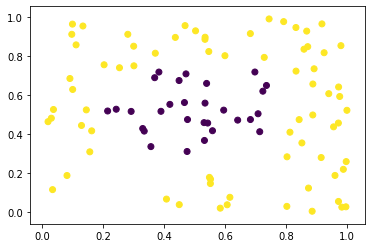

In [259]:
dados = np.array([S[:,0],S[:,1],classe]).transpose()
plt.scatter(dados[:,0].tolist(),dados[:,1].tolist(),c=dados[:,2].tolist())
plt.show()

#### Gerando dados de teste

In [261]:
dados_teste = np.random.rand(t,4)
dados_teste

array([[3.26657451e-01, 4.63903657e-01, 1.53287538e-01, 9.63554431e-01],
       [7.18971286e-01, 2.51756435e-01, 2.61618976e-01, 6.73972688e-01],
       [2.58221538e-02, 2.82734410e-01, 9.42579807e-01, 1.11206833e-02],
       [5.92032181e-01, 1.91827394e-02, 4.18094423e-01, 4.34372960e-01],
       [1.31455346e-01, 3.94839898e-02, 1.23813938e-01, 1.01321610e-01],
       [3.87067005e-01, 3.61750014e-02, 4.74075018e-01, 9.93725854e-01],
       [9.67343248e-02, 5.16545207e-01, 1.78104803e-01, 9.49936572e-01],
       [2.88667987e-01, 6.43912504e-02, 6.08024116e-01, 7.94564566e-01],
       [2.97775011e-01, 1.88206780e-01, 1.08924661e-01, 3.57659671e-01],
       [5.96970521e-01, 7.86335332e-01, 3.06028674e-01, 8.23287694e-01],
       [5.94781693e-02, 3.91831702e-01, 7.48983401e-01, 7.35287790e-01],
       [6.55690755e-01, 6.95043307e-01, 1.83917540e-01, 2.08601476e-01],
       [7.83309465e-01, 5.10553841e-01, 6.08950580e-01, 6.30706774e-01],
       [8.47077236e-01, 5.23745029e-01, 5.51499332e

## Algoritmo K-Nearest-Neighbor

In [204]:
for i in range(t):

    # Gerar exemplo
    ex = Teste[i]
    
    # Calcular distancia a todos os exemplos de S
    # A lista <distancias> contem pares ordenados do tipo (d,j), onde j e'
    # o indice do exemplo de treinamento e d e' a distancia do j-esimo exemplo
    # de treinamento para o exemplo de teste
    distancias = [ (dist_euclidiana(ex, S[j]), j) for j in range(m) ]

    # Determinar vizinhos mais proximos:
    # (ordena lista em ordem crescente da distancia)
    distancias.sort()

    # -------------------------------------------------------------------------
    # Obter indices e classes dos exemplos mais proximos
    indices_dos_mais_proximos = [ distancias[i][1] for i in range(k) ]
    classes_dos_mais_proximos = [ classe[i] for i in indices_dos_mais_proximos ]
    cmp = classes_dos_mais_proximos
    print(cmp)
    
    # Obter frequencia de cada classe existente entre os vizinhos mais proximos
    # Cada item de <frequencias> tem a forma (frequencia, classe)
    frequencias = [ (cmp.count(c), c) for c in classes_dos_mais_proximos ]
    
    # Obter a classe mais frequente (ordena por frequencia, ordem decrescente)
    frequencias.sort(reverse=True)
    previsao = frequencias[0][1] # Pegar classe do primeiro elemento

    # Plotar previsoes
    if previsao == 0:
        plt.scatter(x=[ex[0]], y=[ex[1]], c='b', marker='o')
    else:
        plt.scatter(x=[ex[0]], y=[ex[1]], c='m', marker='o')
plt.title("Previsao")
plt.show()

NameError: name 'Teste' is not defined

In [332]:
def k_vizinhos_pesos(novas_amostras,treino,k_vizinhos = 3):
    previsoes = []
    for i in range(len(novas_amostras)):
        amostra_i = novas_amostras[i]
        dist = np.array( [(dist_euclidiana(amostra_i,treino[j][:-1]),j) for j in range(len(treino)) ])
        if 0 in dist[:,0]:
            x = [ treino[int(dist[int(k)][1])][2]  for a,k in dist if a == 0]
            previsoes.append(np.argmax(np.bincount(x)))
        else:
            dist = dist.tolist()
            dist.sort(key = lambda lista : lista[0])
            indices_dos_mais_proximos = [ int(dist[a][1]) for a in range(k_vizinhos) ]
            distancias_dos_mais_proximos = [ 1/(dist[a][0]) for a in range(k_vizinhos) ]
            classes_dos_mais_proximos = [ treino[b][-1] for b in indices_dos_mais_proximos ]
            #print(classes_dos_mais_proximos)
            soma_classes_dis = { i:0 for i in set(treino[:,-1])}
            for (classe,dis) in zip(classes_dos_mais_proximos,distancias_dos_mais_proximos):
                soma_classes_dis[classe] += dis

            previsoes.append(max(soma_classes_dis,key=soma_classes_dis.get))
    return previsoes
    
#resultado = k_vizinhos_pesos(dados_teste,dados,10)
#plt.scatter(dados_teste[:,0].tolist(),dados_teste[:,1].tolist(),c=resultado)
#plt.show()

### Testando com o iris

In [333]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = iris.data,columns=iris.feature_names)
iris_df["class"] = iris.target
iris_df = iris_df.sample(frac=1)

iris_dfx = np.array(iris_df[:50].drop(['class'],axis=1))
iris_dfx2 = np.array(iris_df[:50])
iris_dfy = np.array(iris_df[51:100])

res = k_vizinhos_pesos(iris_dfx,np.array(iris_dfy))
for k in range(len(res)):
    if iris_dfx2[k][-1] == res[k]:
        print("ACERTOU")
    else:
        print("ERROU")
#np.array(iris_dfy)

{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}
{0.0: 0, 1.0: 0, 2.0: 0}


In [329]:
from itertools import groupby 
a =  set(iris_dfy[:,-1])
a

{0.0, 1.0, 2.0}

array([[5.4, 3.9, 1.3, 0.4, 0. ],
       [6.3, 2.9, 5.6, 1.8, 2. ],
       [6.3, 2.5, 4.9, 1.5, 1. ],
       [6.7, 3.1, 4.7, 1.5, 1. ],
       [4.4, 3. , 1.3, 0.2, 0. ],
       [4.9, 2.5, 4.5, 1.7, 2. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.5, 2.4, 3.7, 1. , 1. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [6. , 2.7, 5.1, 1.6, 1. ],
       [5.8, 2.7, 3.9, 1.2, 1. ],
       [5.1, 3.4, 1.5, 0.2, 0. ],
       [5.5, 2.3, 4. , 1.3, 1. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [5.1, 3.8, 1.9, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [6.1, 3. , 4.6, 1.4, 1. ],
       [6. , 3.4, 4.5, 1.6, 1. ],
       [5.6, 2.8, 4.9, 2. , 2. ],
       [6.7, 3.1, 5.6, 2.4, 2. ],
       [4.5, 2.3, 1.3, 0.3, 0. ],
       [6.7, 3. , 5.2, 2.3, 2. ],
       [7.7, 2.8, 6.7, 2. , 2. ],
       [5.5, 3.5, 1.3, 0.2, 0. ],
       [6. , 3. , 4.8, 1.8, 2. ],
       [6.7, 3.3, 5.7, 2.1, 2. ],
       [7.7, 3